In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Viterbi Algorithm for Hidden Markov Models (HMMs)

In many applications of Hidden Markov Models (HMMs), the latent variables have meaningful interpretations, and it is often of interest to find the most probable sequence of hidden states for a given observation sequence. For instance, in speech recognition, we might wish to find the most probable phoneme sequence for a given series of acoustic observations.

### Problem Definition

We wish to find the most probable sequence of latent states $ Z = \{z_1, z_2, \dots, z_N\} $ given an observation sequence $ X = \{x_1, x_2, \dots, x_N\} $. The goal is to compute:

$$ Z^* = \arg\max_{Z} P(Z | X) $$

This is the core problem that the **Viterbi algorithm** solves.

### Key Differences from Forward-Backward Algorithm

Unlike the forward-backward (sum-product) algorithm, which computes marginals for each state at each time step, the Viterbi algorithm aims to find the most probable sequence of states. The Viterbi algorithm uses **maximization** rather than summation, making it a **max-sum** algorithm.

### Viterbi Recursion

The Viterbi algorithm is based on the following recursion:

1. **Initialization**: The initial probabilities are calculated as:

$$ \omega(z_1) = \ln p(z_1) + \ln p(x_1 | z_1) $$

2. **Recursion**: For $ n = 2, \dots, N $, we compute:

$$ \omega(z_n) = \ln p(x_n | z_n) + \max_{z_{n-1}} \left( \ln p(z_n | z_{n-1}) + \omega(z_{n-1}) \right) $$

This gives us the most probable score up to time $ n $ for each state $ z_n $.

3. **Backtracking**: To find the most probable sequence of states, we backtrack from the final state $ z_N $ by storing the argument of the maximization at each step, i.e., we store the state $ z_{n-1} $ that maximized the score for each state $ z_n $.

$$ k_{n}^{\text{max}} = \psi(k_{n+1}) $$

Where $ \psi(k_{n+1}) $ is the index of the previous state that gave the maximum probability.

### Viterbi Algorithm Summary

The algorithm follows these steps:
1. **Initialization**: Compute the initial state probabilities for $ z_1 $.
2. **Recursion**: For each subsequent observation $ x_n $, compute the probability for each possible state $ z_n $ given the previous state $ z_{n-1} $.
3. **Backtracking**: After processing all observations, backtrack from the last state $ z_N $ to find the most probable sequence of hidden states $ Z^* $.

### Viterbi Algorithm in Pseudocode



In [2]:
import math

# Define parameters
K = 3  # Number of hidden states
N = 5  # Length of the observation sequence

# Example of state transition matrix (A), emission matrix (B), and initial state probabilities (pi)
A = [[0.7, 0.2, 0.1],  # Transition probabilities A[i][j] = P(z_n = j | z_(n-1) = i)
     [0.3, 0.4, 0.3],
     [0.4, 0.3, 0.3]]

B = [[0.5, 0.4, 0.1],  # Emission probabilities B[k][o] = P(x_n = o | z_n = k)
     [0.2, 0.5, 0.3],
     [0.1, 0.3, 0.6]]

pi = [0.6, 0.3, 0.1]  # Initial state probabilities P(z_1)

# Example of observation sequence (X) (observations can be integers representing some event)
X = [0, 1, 2, 0, 1]  # Observation sequence, with values corresponding to indices in B

# Define probability functions
def p_z1(k):
    """Initial state probability P(z_1 = k)"""
    return pi[k]

def p_x1_given_z(k):
    """Emission probability P(x_1 = X[0] | z_1 = k)"""
    return B[k][X[0]]

def p_z_given_z(k, j):
    """Transition probability P(z_n = k | z_(n-1) = j)"""
    return A[j][k]

def p_x_given_z(n, k):
    """Emission probability P(x_n = X[n] | z_n = k)"""
    return B[k][X[n]]

# Initialize omega and backpointer arrays
omega = [[float('-inf')] * K for _ in range(N)]  # Omega stores the max probabilities
backpointer = [[-1] * K for _ in range(N)]  # Stores the indices of the maximizing states

# Initialization step
for k in range(K):
    omega[0][k] = math.log(p_z1(k)) + math.log(p_x1_given_z(k))

# Recursion step
for n in range(1, N):
    for k in range(K):
        max_val = float('-inf')
        max_state = -1
        for j in range(K):
            value = omega[n-1][j] + math.log(p_z_given_z(k, j)) + math.log(p_x_given_z(n, k))
            if value > max_val:
                max_val = value
                max_state = j
        omega[n][k] = max_val
        backpointer[n][k] = max_state

# Backtracking step
best_path = [0] * N
best_path[N-1] = max(range(K), key=lambda k: omega[N-1][k])  # Find the last state with highest omega
for n in range(N-2, -1, -1):
    best_path[n] = backpointer[n+1][best_path[n+1]]  # Backtrack using the backpointer

# Output the most probable sequence of states
print("Most probable sequence of states:", best_path)


Most probable sequence of states: [0, 0, 0, 0, 0]




##  Extensions of the Hidden Markov Model

The basic Hidden Markov Model (HMM), along with the standard training algorithm based on maximum likelihood, has been extended in numerous ways to meet the requirements of particular applications. These extensions address specific issues and limitations of the HMM.

### Discriminative Training for Sequence Classification

One common limitation of HMMs is that they can be poor generative models for certain types of data. For instance, when used for digit recognition, the synthetic digits generated by an HMM can look unrepresentative of the actual training data. In such cases, discriminative techniques can be used to improve model performance, especially for sequence classification tasks.

Given a training set of $ R $ observation sequences $ X_r $, where $ r = 1, \dots, R $, each labelled according to its class $ m $, the goal is to optimize the cross-entropy:

$$
\sum_{r=1}^{R} \ln p(m_r | X_r)
$$

Using Bayes' theorem, this can be rewritten in terms of the sequence probabilities associated with the hidden Markov models as:

$$
\sum_{r=1}^{R} \sum_{l=1}^{M} \ln \left( \frac{ p(X_r | \theta_l) p(m_r) }{ p(X_r | \theta_l) p(m_r) } \right)
$$

where $ p(m) $ is the prior probability of class $ m $. Optimization of this cost function is more complex than for maximum likelihood.

### Duration Models in HMMs

A significant weakness of the standard HMM is the way in which it represents the distribution of times a system remains in a given state. The probability that a sequence sampled from a given hidden Markov model will spend precisely $ T $ steps in state $ k $ and then transition to another state is given by:

$$
p(T) = (A_{kk})^T(1 - A_{kk}) \propto \exp \left( - T \ln A_{kk} \right)
$$

This distribution decays exponentially with $ T $, which may be unrealistic for many applications. This issue can be resolved by modeling the state duration explicitly. In this approach, the diagonal coefficients $ A_{kk} $ are set to zero, and each state $ k $ is associated with a probability distribution $ p(T | k) $ for the duration times.

### Autoregressive Hidden Markov Models

Another limitation of the HMM is its inability to capture long-range correlations between observed variables. To address this, the HMM can be generalized into an **autoregressive hidden Markov model (AR-HMM)**. In the AR-HMM, the observation at time $ n $ depends not only on the current hidden state $ z_n $, but also on previous observations, such as $ x_{n-1} $ and $ x_{n-2} $.

This extension can be modeled as a probabilistic graphical model, as shown in the figure below:

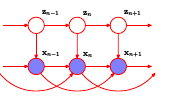

Fig.17 Section of an autoregressive hidden Markov model, in which the distribution of the observation xn depends on a subset of the previous observations as well as on the hidden state $z_n$ . In this example, the distribution of xn depends on the two previous observations $x_n−1$ and $x_n−2$ .


In the AR-HMM, the emission density can be represented as a **linear-Gaussian model** where the conditional distribution for $ x_n $ given previous observations and the hidden state is a Gaussian with a mean that is a linear combination of the previous observations.

### Input-Output Hidden Markov Models

The **input-output hidden Markov model** (IO-HMM) is another extension where the system is influenced not only by the hidden states but also by a sequence of input variables. In this model, both the emission probabilities and transition probabilities depend on the input sequence $ u_1, \dots, u_N $.

For example, in supervised learning, the input variables $ u_1, \dots, u_N $ might influence the distribution of the hidden states or the output observations $ x_1, \dots, x_N $. The input-output HMM maintains the conditional independence property, allowing for efficient learning algorithms using techniques like the **Expectation-Maximization (EM)** algorithm.

The likelihood function for this model is given by:

$$
L(\theta) = p(X | U, \theta)
$$

where $ U $ is a matrix whose rows represent the input sequence $ u_n^T $.

### Factorial Hidden Markov Models

A **factorial hidden Markov model (FHMM)** is a more complex extension of the standard HMM. In a FHMM, multiple independent hidden states are modeled. This model is useful when multiple latent factors are involved, each of which follows its own HMM, and their interactions contribute to the observed data.

### Summary

These extensions of the HMM address various limitations, such as poor modeling of state durations, inability to capture long-range correlations, and lack of discriminative training. They enable HMMs to be more effective for complex sequence modeling tasks such as speech recognition and sequence classification.


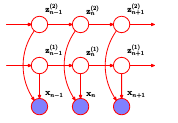

Fig.19 A factorial hidden Markov model com- prising two Markov chains of latent variables. For continuous observed variables x, one possible choice of emission model is a linear-Gaussian density in which the mean of the Gaussian is a linear combi- nation of the states of the corresponding latent variables.

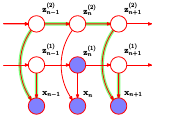

Fig.20 Example of a path, highlighted in green, which is head-to-head at the observed nodes $x_n−1$ and $x_n+1$ , and head-to-tail (2) (2) at the unobserved nodes $zn−1$ , $z_n$ and (2) $z_n+1$ . Thus the path is not blocked and so the conditional independence property (13.5) does not hold for the individual latent chains of the factorial HMM model. As a consequence, there is no efﬁcient exact E step for this model.


In [3]:
import numpy as np

# Basic HMM Class
class HMM:
    def __init__(self, n_states, n_obs):
        self.n_states = n_states
        self.n_obs = n_obs
        self.transition_prob = np.random.rand(n_states, n_states)
        self.emission_prob = np.random.rand(n_states, n_obs)
        self.initial_prob = np.random.rand(n_states)
    
    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the forward algorithm.
        """
        T = len(sequence)
        alpha = np.zeros((T, self.n_states))
        
        # Initial probabilities
        for state in range(self.n_states):
            alpha[0, state] = self.initial_prob[state] * self.emission_prob[state, sequence[0]]
        
        # Forward pass
        for t in range(1, T):
            for state in range(self.n_states):
                alpha[t, state] = np.sum(alpha[t-1] * self.transition_prob[:, state]) * self.emission_prob[state, sequence[t]]
        
        return np.sum(alpha[T-1])


# Discriminative Training for Sequence Classification
def cross_entropy_loss(X, Y, models):
    """
    Compute the cross-entropy loss for sequence classification using multiple HMM models.
    
    Parameters:
    - X: List of sequences (each sequence is a list of observations).
    - Y: List of class labels corresponding to the sequences.
    - models: List of trained HMM models (one per class).
    
    Returns:
    - The computed cross-entropy loss.
    """
    loss = 0
    for r, sequence in enumerate(X):
        model = models[Y[r]]  # Select the model for the true class
        prob_sequence = model.compute_probability(sequence)  # Calculate probability of the sequence
        loss -= np.log(prob_sequence)  # Compute cross-entropy loss
    return loss


# Duration HMM Class (State Duration Modeling)
class DurationHMM(HMM):
    def __init__(self, n_states, n_obs, max_duration):
        super().__init__(n_states, n_obs)
        self.max_duration = max_duration
        self.duration_prob = np.random.rand(n_states, max_duration)  # Duration probabilities for each state

    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the duration model.
        """
        T = len(sequence)
        alpha = np.zeros((T, self.n_states))
        
        # Initial probabilities with duration effects
        for state in range(self.n_states):
            alpha[0, state] = self.initial_prob[state] * self.emission_prob[state, sequence[0]] * self.duration_prob[state, 1]

        # Forward pass with duration effect
        for t in range(1, T):
            for state in range(self.n_states):
                for duration in range(1, self.max_duration+1):
                    if t - duration - 1 >= 0:  # Ensure we do not go out of bounds
                        alpha[t, state] += np.sum(alpha[t-duration] * self.transition_prob[:, state]) * self.emission_prob[state, sequence[t]] * self.duration_prob[state, duration]
        
        return np.sum(alpha[T-1])


# Autoregressive Hidden Markov Model (AR-HMM)
class ARHMM(HMM):
    def __init__(self, n_states, n_obs, n_lags):
        super().__init__(n_states, n_obs)
        self.n_lags = n_lags  # Number of lags for autoregression
        self.autoregressive_params = np.random.rand(self.n_states, self.n_lags)  # Parameters for autoregressive model

    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the autoregressive model.
        """
        T = len(sequence)
        alpha = np.zeros((T, self.n_states))
        
        # Initial probabilities with autoregression
        for state in range(self.n_states):
            alpha[0, state] = self.initial_prob[state] * self.emission_prob[state, sequence[0]]

        # Forward pass with autoregression
        for t in range(1, T):
            for state in range(self.n_states):
                for lag in range(self.n_lags):
                    if t - lag - 1 >= 0:  # Ensure we do not go out of bounds
                        alpha[t, state] += np.sum(alpha[t-lag-1] * self.transition_prob[:, state]) * self.emission_prob[state, sequence[t]] * self.autoregressive_params[state, lag]
        
        return np.sum(alpha[T-1])


# Input-Output Hidden Markov Model (IO-HMM)
class IOHMM(HMM):
    def __init__(self, n_states, n_obs, n_inputs):
        super().__init__(n_states, n_obs)
        self.n_inputs = n_inputs  # Number of input variables
        self.input_params = np.random.rand(self.n_states, self.n_inputs)  # Parameters linking inputs to states
    
    def compute_probability(self, sequence, inputs):
        """
        Compute the probability of a sequence using the input-output model.
        """
        T = len(sequence)
        alpha = np.zeros((T, self.n_states))
        
        # Initial probabilities with inputs
        for state in range(self.n_states):
            alpha[0, state] = self.initial_prob[state] * self.emission_prob[state, sequence[0]] * np.dot(self.input_params[state], inputs[0])
        
        # Forward pass with inputs influencing the transition and emission probabilities
        for t in range(1, T):
            for state in range(self.n_states):
                alpha[t, state] = np.sum(alpha[t-1] * self.transition_prob[:, state]) * self.emission_prob[state, sequence[t]] * np.dot(self.input_params[state], inputs[t])
        
        return np.sum(alpha[T-1])


# Example usage of all models
if __name__ == "__main__":
    # Sample sequences and labels
    X_train = [[0, 1, 2], [1, 2, 3], [0, 2, 1]]  # Example sequences
    Y_train = [0, 1, 0]  # Class labels for sequences
    n_states = 3
    n_obs = 4
    n_classes = 2

    # Create models for each class (Here, just basic HMMs for simplicity)
    models = [HMM(n_states, n_obs), HMM(n_states, n_obs)]  # In a real case, you would train the models

    # Compute cross-entropy loss
    loss = cross_entropy_loss(X_train, Y_train, models)
    print(f"Cross-entropy loss: {loss}")
    
    # Example for Duration HMM
    duration_model = DurationHMM(n_states, n_obs, max_duration=5)
    sequence = [0, 1, 2, 3]
    prob = duration_model.compute_probability(sequence)
    print(f"Duration HMM Probability: {prob}")

    # Example for Autoregressive HMM
    ar_model = ARHMM(n_states, n_obs, n_lags=2)
    prob_ar = ar_model.compute_probability(sequence)
    print(f"Autoregressive HMM Probability: {prob_ar}")

    # Example for IO HMM
    input_sequence = [[0, 1], [1, 0], [0, 0], [1, 1]]  # Example inputs
    io_model = IOHMM(n_states, n_obs, n_inputs=2)
    prob_io = io_model.compute_probability(sequence, input_sequence)
    print(f"Input-Output HMM Probability: {prob_io}")


Cross-entropy loss: 5.962674563259229
Duration HMM Probability: 0.0
Autoregressive HMM Probability: 0.07147654067112258
Input-Output HMM Probability: 0.0


In [4]:
import random
import math

# Basic HMM Class
class HMM:
    def __init__(self, n_states, n_obs):
        self.n_states = n_states
        self.n_obs = n_obs
        self.transition_prob = [[random.random() for _ in range(n_states)] for _ in range(n_states)]
        self.emission_prob = [[random.random() for _ in range(n_obs)] for _ in range(n_states)]
        self.initial_prob = [random.random() for _ in range(n_states)]
    
    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the forward algorithm.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]]
        
        # Forward pass
        for t in range(1, T):
            for state in range(self.n_states):
                sum_prob = 0
                for prev_state in range(self.n_states):
                    sum_prob += alpha[t-1][prev_state] * self.transition_prob[prev_state][state]
                alpha[t][state] = sum_prob * self.emission_prob[state][sequence[t]]
        
        return sum(alpha[T-1])

# Discriminative Training for Sequence Classification
def cross_entropy_loss(X, Y, models):
    """
    Compute the cross-entropy loss for sequence classification using multiple HMM models.
    
    Parameters:
    - X: List of sequences (each sequence is a list of observations).
    - Y: List of class labels corresponding to the sequences.
    - models: List of trained HMM models (one per class).
    
    Returns:
    - The computed cross-entropy loss.
    """
    loss = 0
    for r, sequence in enumerate(X):
        model = models[Y[r]]  # Select the model for the true class
        prob_sequence = model.compute_probability(sequence)  # Calculate probability of the sequence
        loss -= math.log(prob_sequence)  # Compute cross-entropy loss
    return loss

# Duration HMM Class (State Duration Modeling)
class DurationHMM(HMM):
    def __init__(self, n_states, n_obs, max_duration):
        super().__init__(n_states, n_obs)
        self.max_duration = max_duration
        self.duration_prob = [[random.random() for _ in range(max_duration)] for _ in range(n_states)]  # Duration probabilities for each state

    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the duration model.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities with duration effects
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]] * self.duration_prob[state][1]

        # Forward pass with duration effect
        for t in range(1, T):
            for state in range(self.n_states):
                for duration in range(1, self.max_duration+1):
                    if t - duration - 1 >= 0:  # Ensure we do not go out of bounds
                        sum_prob = 0
                        for prev_state in range(self.n_states):
                            sum_prob += alpha[t-duration][prev_state] * self.transition_prob[prev_state][state]
                        alpha[t][state] += sum_prob * self.emission_prob[state][sequence[t]] * self.duration_prob[state][duration]
        
        return sum(alpha[T-1])

# Autoregressive Hidden Markov Model (AR-HMM)
class ARHMM(HMM):
    def __init__(self, n_states, n_obs, n_lags):
        super().__init__(n_states, n_obs)
        self.n_lags = n_lags  # Number of lags for autoregression
        self.autoregressive_params = [[random.random() for _ in range(n_lags)] for _ in range(n_states)]  # Parameters for autoregressive model

    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the autoregressive model.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities with autoregression
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]]

        # Forward pass with autoregression
        for t in range(1, T):
            for state in range(self.n_states):
                for lag in range(self.n_lags):
                    if t - lag - 1 >= 0:  # Ensure we do not go out of bounds
                        sum_prob = 0
                        for prev_state in range(self.n_states):
                            sum_prob += alpha[t-lag-1][prev_state] * self.transition_prob[prev_state][state]
                        alpha[t][state] += sum_prob * self.emission_prob[state][sequence[t]] * self.autoregressive_params[state][lag]
        
        return sum(alpha[T-1])

# Input-Output Hidden Markov Model (IO-HMM)
class IOHMM(HMM):
    def __init__(self, n_states, n_obs, n_inputs):
        super().__init__(n_states, n_obs)
        self.n_inputs = n_inputs  # Number of input variables
        self.input_params = [[random.random() for _ in range(n_inputs)] for _ in range(n_states)]  # Parameters linking inputs to states
    
    def compute_probability(self, sequence, inputs):
        """
        Compute the probability of a sequence using the input-output model.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities with inputs
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]] * sum([self.input_params[state][i] * inputs[0][i] for i in range(self.n_inputs)])
        
        # Forward pass with inputs influencing the transition and emission probabilities
        for t in range(1, T):
            for state in range(self.n_states):
                sum_prob = 0
                for prev_state in range(self.n_states):
                    sum_prob += alpha[t-1][prev_state] * self.transition_prob[prev_state][state]
                alpha[t][state] = sum_prob * self.emission_prob[state][sequence[t]] * sum([self.input_params[state][i] * inputs[t][i] for i in range(self.n_inputs)])
        
        return sum(alpha[T-1])

# Example usage of all models
if __name__ == "__main__":
    # Sample sequences and labels
    X_train = [[0, 1, 2], [1, 2, 3], [0, 2, 1]]  # Example sequences
    Y_train = [0, 1, 0]  # Class labels for sequences
    n_states = 3
    n_obs = 4
    n_classes = 2

    # Create models for each class (Here, just basic HMMs for simplicity)
    models = [HMM(n_states, n_obs), HMM(n_states, n_obs)]  # In a real case, you would train the models

    # Compute cross-entropy loss
    loss = cross_entropy_loss(X_train, Y_train, models)
    print(f"Cross-entropy loss: {loss}")
    
    # Example for Duration HMM
    duration_model = DurationHMM(n_states, n_obs, max_duration=5)
    sequence = [0, 1, 2, 3]
    prob = duration_model.compute_probability(sequence)
    print(f"Duration HMM Probability: {prob}")

    # Example for Autoregressive HMM
    ar_model = ARHMM(n_states, n_obs, n_lags=2)
    prob_ar = ar_model.compute_probability(sequence)
    print(f"Autoregressive HMM Probability: {prob_ar}")

    # Example for IO HMM
    input_sequence = [[0, 1], [1, 0], [0, 0], [1, 1]]  # Example inputs
    io_model = IOHMM(n_states, n_obs, n_inputs=2)
    prob_io = io_model.compute_probability(sequence, input_sequence)
    print(f"Input-Output HMM Probability: {prob_io}")


Cross-entropy loss: 5.7196169695696515
Duration HMM Probability: 0.0
Autoregressive HMM Probability: 0.09827010909626802
Input-Output HMM Probability: 0.0


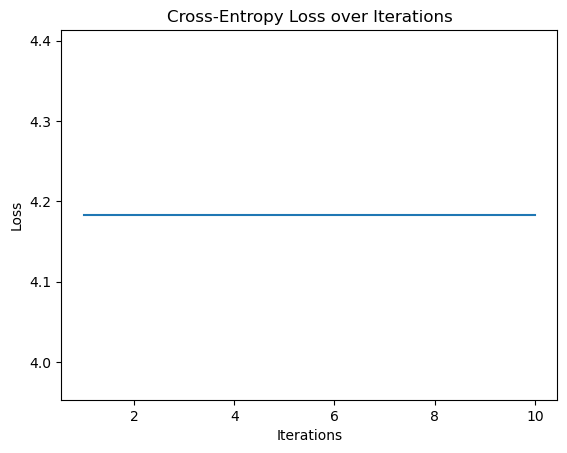

Duration HMM Probability: 0.0


IndexError: list index out of range

In [5]:
import random
import math
import matplotlib.pyplot as plt

# Basic HMM Class
class HMM:
    def __init__(self, n_states, n_obs):
        self.n_states = n_states
        self.n_obs = n_obs
        self.transition_prob = [[random.random() for _ in range(n_states)] for _ in range(n_states)]
        self.emission_prob = [[random.random() for _ in range(n_obs)] for _ in range(n_states)]
        self.initial_prob = [random.random() for _ in range(n_states)]
    
    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the forward algorithm.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]]
        
        # Forward pass
        for t in range(1, T):
            for state in range(self.n_states):
                sum_prob = 0
                for prev_state in range(self.n_states):
                    sum_prob += alpha[t-1][prev_state] * self.transition_prob[prev_state][state]
                alpha[t][state] = sum_prob * self.emission_prob[state][sequence[t]]
        
        return sum(alpha[T-1])

# Discriminative Training for Sequence Classification
def cross_entropy_loss(X, Y, models):
    """
    Compute the cross-entropy loss for sequence classification using multiple HMM models.
    
    Parameters:
    - X: List of sequences (each sequence is a list of observations).
    - Y: List of class labels corresponding to the sequences.
    - models: List of trained HMM models (one per class).
    
    Returns:
    - The computed cross-entropy loss.
    """
    loss = 0
    for r, sequence in enumerate(X):
        model = models[Y[r]]  # Select the model for the true class
        prob_sequence = model.compute_probability(sequence)  # Calculate probability of the sequence
        loss -= math.log(prob_sequence)  # Compute cross-entropy loss
    return loss

# Duration HMM Class (State Duration Modeling)
class DurationHMM(HMM):
    def __init__(self, n_states, n_obs, max_duration):
        super().__init__(n_states, n_obs)
        self.max_duration = max_duration
        self.duration_prob = [[random.random() for _ in range(max_duration)] for _ in range(n_states)]  # Duration probabilities for each state

    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the duration model.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities with duration effects
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]] * self.duration_prob[state][1]

        # Forward pass with duration effect
        for t in range(1, T):
            for state in range(self.n_states):
                for duration in range(1, self.max_duration+1):
                    if t - duration - 1 >= 0:  # Ensure we do not go out of bounds
                        sum_prob = 0
                        for prev_state in range(self.n_states):
                            sum_prob += alpha[t-duration][prev_state] * self.transition_prob[prev_state][state]
                        alpha[t][state] += sum_prob * self.emission_prob[state][sequence[t]] * self.duration_prob[state][duration]
        
        return sum(alpha[T-1])

# Autoregressive Hidden Markov Model (AR-HMM)
class ARHMM(HMM):
    def __init__(self, n_states, n_obs, n_lags):
        super().__init__(n_states, n_obs)
        self.n_lags = n_lags  # Number of lags for autoregression
        self.autoregressive_params = [[random.random() for _ in range(n_lags)] for _ in range(n_states)]  # Parameters for autoregressive model

    def compute_probability(self, sequence):
        """
        Compute the probability of a sequence using the autoregressive model.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities with autoregression
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]]

        # Forward pass with autoregression
        for t in range(1, T):
            for state in range(self.n_states):
                for lag in range(self.n_lags):
                    if t - lag - 1 >= 0:  # Ensure we do not go out of bounds
                        sum_prob = 0
                        for prev_state in range(self.n_states):
                            sum_prob += alpha[t-lag-1][prev_state] * self.transition_prob[prev_state][state]
                        alpha[t][state] += sum_prob * self.emission_prob[state][sequence[t]] * self.autoregressive_params[state][lag]
        
        return sum(alpha[T-1])

# Input-Output Hidden Markov Model (IO-HMM)
class IOHMM(HMM):
    def __init__(self, n_states, n_obs, n_inputs):
        super().__init__(n_states, n_obs)
        self.n_inputs = n_inputs  # Number of input variables
        self.input_params = [[random.random() for _ in range(n_inputs)] for _ in range(n_states)]  # Parameters linking inputs to states
    
    def compute_probability(self, sequence, inputs):
        """
        Compute the probability of a sequence using the input-output model.
        """
        T = len(sequence)
        alpha = [[0 for _ in range(self.n_states)] for _ in range(T)]
        
        # Initial probabilities with inputs
        for state in range(self.n_states):
            alpha[0][state] = self.initial_prob[state] * self.emission_prob[state][sequence[0]] * sum([self.input_params[state][i] * inputs[0][i] for i in range(self.n_inputs)])
        
        # Forward pass with inputs influencing the transition and emission probabilities
        for t in range(1, T):
            for state in range(self.n_states):
                sum_prob = 0
                for prev_state in range(self.n_states):
                    sum_prob += alpha[t-1][prev_state] * self.transition_prob[prev_state][state]
                alpha[t][state] = sum_prob * self.emission_prob[state][sequence[t]] * sum([self.input_params[state][i] * inputs[t][i] for i in range(self.n_inputs)])
        
        return sum(alpha[T-1])

# Example usage of all models
if __name__ == "__main__":
    # Sample sequences and labels
    X_train = [[0, 1, 2], [1, 2, 3], [0, 2, 1]]  # Example sequences
    Y_train = [0, 1, 0]  # Class labels for sequences
    n_states = 3
    n_obs = 4
    n_classes = 2

    # Create models for each class (Here, just basic HMMs for simplicity)
    models = [HMM(n_states, n_obs), HMM(n_states, n_obs)]  # In a real case, you would train the models

    # Compute cross-entropy loss and plot
    losses = []
    for i in range(1, 11):
        loss = cross_entropy_loss(X_train, Y_train, models)
        losses.append(loss)

    plt.plot(range(1, 11), losses)
    plt.title('Cross-Entropy Loss over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    
    # Example for Duration HMM
    duration_model = DurationHMM(n_states, n_obs, max_duration=5)
    sequence = [0, 1, 2, 3]
    prob = duration_model.compute_probability(sequence)
    print(f"Duration HMM Probability: {prob}")

    # Plot Duration HMM Probability over sequence length
    probabilities = []
    for length in range(1, 11):
        sequence = [random.randint(0, n_obs - 1) for _ in range(length)]
        prob = duration_model.compute_probability(sequence)
        probabilities.append(prob)
    
    plt.plot(range(1, 11), probabilities)
    plt.title('Duration HMM Probability over Sequence Length')
    plt.xlabel('Sequence Length')
    plt.ylabel('Probability')
    plt.show()

    # Example for Autoregressive HMM
    ar_model = ARHMM(n_states, n_obs, n_lags=2)
    prob_ar = ar_model.compute_probability(sequence)
    print(f"Autoregressive HMM Probability: {prob_ar}")

    # Plot AR HMM Probability over sequence length
    ar_probabilities = []
    for length in range(1, 11):
        sequence = [random.randint(0, n_obs - 1) for _ in range(length)]
        prob_ar = ar_model.compute_probability(sequence)
        ar_probabilities.append(prob_ar)
    
    plt.plot(range(1, 11), ar_probabilities)
    plt.title('Autoregressive HMM Probability over Sequence Length')
    plt.xlabel('Sequence Length')
    plt.ylabel('Probability')
    plt.show()

    # Example for IO HMM
    input_sequence = [[0, 1], [1, 0], [0, 0], [1, 1]]  # Example inputs
    io_model = IOHMM(n_states, n_obs, n_inputs=2)
    prob_io = io_model.compute_probability(sequence, input_sequence)
    print(f"Input-Output HMM Probability: {prob_io}")

    # Plot IO HMM Probability over sequence length
    io_probabilities = []
    for length in range(1, 11):
        sequence = [random.randint(0, n_obs - 1) for _ in range(length)]
        io_prob = io_model.compute_probability(sequence, input_sequence)
        io_probabilities.append(io_prob)
    
    plt.plot(range(1, 11), io_probabilities)
    plt.title('IO HMM Probability over Sequence Length')
    plt.xlabel('Sequence Length')
    plt.ylabel('Probability')
    plt.show()


## Factorial Hidden Markov Model

The **Factorial Hidden Markov Model** (FHMM) comprises multiple Markov chains of latent variables. These chains allow the model to represent complex dependencies between the observed data. 

### Emission Model
For continuous observed variables $ x $, one possible choice of the emission model is a linear-Gaussian density in which the mean of the Gaussian is a linear combination of the states of the corresponding latent variables. 

Let $ z_n^{(1)}, z_n^{(2)}, \dots, z_n^{(M)} $ represent the latent states at time step $ n $, with $ M $ different chains. The observed variable at time $ n $, $ x_n $, is conditioned on the states of all the latent variables at that same time step:

$$
x_n \sim \mathcal{N}(\mu_n, \sigma^2)
$$

where $ \mu_n $ is a linear combination of the latent variables:

$$
\mu_n = \sum_{m=1}^{M} \alpha_m z_n^{(m)}
$$

### Motivation for FHMM
The primary motivation for considering factorial HMMs is the ability to represent a large number of bits of information with fewer latent states. For example, a standard HMM to represent 10 bits would need $K = 2^{10} = 1024 $ latent states, whereas a factorial HMM can use $ 10 $ binary latent chains to model the same amount of information.

### Complexity of Training FHMM
The primary disadvantage of factorial HMMs is the increased complexity in training. Specifically, the **Expectation-Maximization (EM)** algorithm has difficulties during the **E-step**. The observation of the $ x $-variables introduces dependencies between the latent chains, which makes independent forward-backward recursions (typical in standard HMMs) ineffective.

### Conditional Independence and d-Separation
In Fig.19, the variables $ z_n^{(1)} $ and $ z_n^{(2)} $ are connected through the observed node $ x_n $, violating conditional independence. This can be seen through **d-separation** as follows:

- $ z_n^{(1)} $ and $ z_n^{(2)} $ are not d-separated because they are connected at $ x_n $, meaning the latent chains are not conditionally independent.

As a result, the key conditional independence property for individual Markov chains does not hold in a factorial HMM.

### Transforming to Standard HMM
Suppose there are $ M $ chains of latent nodes, each with $ K $ possible states. There are $ K^M $ combinations of latent variables at any given time step. This results in an equivalent standard HMM with a single chain of latent variables, where each latent variable has $ K^M $ states. The computational complexity of this transformation is $ O(N K^{2M}) $, which grows exponentially with $ M $.

This transformation leads to intractability for large $ M $. One possible solution is to use **sampling methods** (as discussed in Chapter 11).

### Variational Inference
An alternative approach is to use **variational inference** techniques, which make the problem tractable. Ghahramani and Jordan (1997) proposed using a variational posterior distribution that is factorized with respect to the latent variables.

- A simple variational distribution can factorize the posterior distribution of latent variables.
- A more powerful approach is to use independent Markov chains to represent the latent chains in the original model.

In this case, the variational inference algorithm involves running independent forward-backward recursions along each chain. This is computationally efficient and captures correlations between variables within the same chain.

### Summary
Graphical models, such as the factorial HMM, allow for the construction of flexible probabilistic structures. Variational inference provides a powerful framework for approximating solutions when exact methods are computationally intractable.


In [6]:
import numpy as np

class FHMM:
    def __init__(self, n_states, n_obs, n_chains):
        """
        Initialize the Factorial HMM.
        
        Parameters:
        - n_states: Number of states in each chain.
        - n_obs: Number of possible observation values.
        - n_chains: Number of latent chains.
        """
        self.n_states = n_states
        self.n_obs = n_obs
        self.n_chains = n_chains
        
        # Transition probability for each chain
        self.transition_probs = np.random.rand(n_chains, n_states, n_states)
        
        # Emission probability for each state
        self.emission_probs = np.random.rand(n_chains, n_states, n_obs)
        
        # Initial state probabilities
        self.initial_probs = np.random.rand(n_chains, n_states)
        
    def forward(self, sequence):
        """
        Forward pass for computing the probability of the sequence using the factorial HMM.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        
        Returns:
        - Probability of the observed sequence.
        """
        T = len(sequence)  # Length of the sequence
        alpha = np.zeros((T, self.n_chains, self.n_states))  # Forward variable
        
        # Initialization
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                alpha[0, chain, state] = self.initial_probs[chain, state] * self.emission_probs[chain, state, sequence[0]]
        
        # Recursion (Forward pass)
        for t in range(1, T):
            for chain in range(self.n_chains):
                for state in range(self.n_states):
                    alpha[t, chain, state] = np.sum(alpha[t-1, chain, :] * self.transition_probs[chain, :, state]) * \
                        self.emission_probs[chain, state, sequence[t]]
        
        # Marginalize over the chains and states to get the final probability of the sequence
        return np.sum(alpha[T-1, :, :])
    
    def variational_inference(self, sequence, max_iterations=100):
        """
        Variational inference for approximating the factorial HMM model.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        - max_iterations: Number of iterations for variational inference.
        
        Returns:
        - Approximate probability of the observed sequence.
        """
        # Initialize variational parameters (factorized approximation)
        variational_params = np.ones((self.n_chains, len(sequence), self.n_states))
        
        for _ in range(max_iterations):
            # Update the variational parameters using a simple update rule (mean-field)
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    for state in range(self.n_states):
                        # Calculate the expected emission probability
                        emission = self.emission_probs[chain, state, sequence[t]]
                        
                        # Calculate expected transition probabilities
                        transition = np.sum(variational_params[chain, t-1, :] * self.transition_probs[chain, :, state]) if t > 0 else 1
                        
                        # Update the variational parameters
                        variational_params[chain, t, state] = emission * transition
            
            # Normalize the variational parameters
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    total = np.sum(variational_params[chain, t, :])
                    variational_params[chain, t, :] /= total
        
        # Compute the approximate probability
        prob = 1
        for t in range(len(sequence)):
            for chain in range(self.n_chains):
                prob *= np.sum(variational_params[chain, t, :] * self.emission_probs[chain, :, sequence[t]])
        
        return prob

# Example usage
if __name__ == "__main__":
    # Define number of states, observations, and latent chains
    n_states = 3
    n_obs = 4  # Number of different observations
    n_chains = 2  # Number of latent chains
    
    # Create the FHMM model
    model = FHMM(n_states, n_obs, n_chains)
    
    # Example sequence (observations)
    sequence = [0, 1, 2, 3]
    
    # Compute the probability using the forward algorithm
    prob_forward = model.forward(sequence)
    print(f"Forward algorithm probability: {prob_forward}")
    
    # Compute the probability using variational inference
    prob_variational = model.variational_inference(sequence)
    print(f"Variational inference probability: {prob_variational}")


Forward algorithm probability: 1.0489215247934256
Variational inference probability: 0.01018304575191031


In [7]:
import random

class FHMM:
    def __init__(self, n_states, n_obs, n_chains):
        """
        Initialize the Factorial HMM.
        
        Parameters:
        - n_states: Number of states in each chain.
        - n_obs: Number of possible observation values.
        - n_chains: Number of latent chains.
        """
        self.n_states = n_states
        self.n_obs = n_obs
        self.n_chains = n_chains
        
        # Transition probability for each chain
        self.transition_probs = [[[random.random() for _ in range(n_states)] for _ in range(n_states)] for _ in range(n_chains)]
        
        # Emission probability for each state
        self.emission_probs = [[[random.random() for _ in range(n_obs)] for _ in range(n_states)] for _ in range(n_chains)]
        
        # Initial state probabilities
        self.initial_probs = [[random.random() for _ in range(n_states)] for _ in range(n_chains)]
        
    def forward(self, sequence):
        """
        Forward pass for computing the probability of the sequence using the factorial HMM.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        
        Returns:
        - Probability of the observed sequence.
        """
        T = len(sequence)  # Length of the sequence
        alpha = [[[0.0 for _ in range(self.n_states)] for _ in range(self.n_chains)] for _ in range(T)]  # Forward variable
        
        # Initialization
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                alpha[0][chain][state] = self.initial_probs[chain][state] * self.emission_probs[chain][state][sequence[0]]
        
        # Recursion (Forward pass)
        for t in range(1, T):
            for chain in range(self.n_chains):
                for state in range(self.n_states):
                    alpha[t][chain][state] = 0
                    for prev_state in range(self.n_states):
                        alpha[t][chain][state] += alpha[t-1][chain][prev_state] * self.transition_probs[chain][prev_state][state]
                    alpha[t][chain][state] *= self.emission_probs[chain][state][sequence[t]]
        
        # Marginalize over the chains and states to get the final probability of the sequence
        final_prob = 0.0
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                final_prob += alpha[T-1][chain][state]
        
        return final_prob
    
    def variational_inference(self, sequence, max_iterations=100):
        """
        Variational inference for approximating the factorial HMM model.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        - max_iterations: Number of iterations for variational inference.
        
        Returns:
        - Approximate probability of the observed sequence.
        """
        # Initialize variational parameters (factorized approximation)
        variational_params = [[[1.0 for _ in range(self.n_states)] for _ in range(len(sequence))] for _ in range(self.n_chains)]
        
        for _ in range(max_iterations):
            # Update the variational parameters using a simple update rule (mean-field)
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    for state in range(self.n_states):
                        # Calculate the expected emission probability
                        emission = self.emission_probs[chain][state][sequence[t]]
                        
                        # Calculate expected transition probabilities
                        transition = 0
                        if t > 0:
                            for prev_state in range(self.n_states):
                                transition += variational_params[chain][t-1][prev_state] * self.transition_probs[chain][prev_state][state]
                        else:
                            transition = 1
                        
                        # Update the variational parameters
                        variational_params[chain][t][state] = emission * transition
            
            # Normalize the variational parameters
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    total = sum(variational_params[chain][t])
                    for state in range(self.n_states):
                        variational_params[chain][t][state] /= total
        
        # Compute the approximate probability
        prob = 1.0
        for t in range(len(sequence)):
            for chain in range(self.n_chains):
                emission_prob = 0
                for state in range(self.n_states):
                    emission_prob += variational_params[chain][t][state] * self.emission_probs[chain][state][sequence[t]]
                prob *= emission_prob
        
        return prob

# Example usage
if __name__ == "__main__":
    # Define number of states, observations, and latent chains
    n_states = 3
    n_obs = 4  # Number of different observations
    n_chains = 2  # Number of latent chains
    
    # Create the FHMM model
    model = FHMM(n_states, n_obs, n_chains)
    
    # Example sequence (observations)
    sequence = [0, 1, 2, 3]
    
    # Compute the probability using the forward algorithm
    prob_forward = model.forward(sequence)
    print(f"Forward algorithm probability: {prob_forward}")
    
    # Compute the probability using variational inference
    prob_variational = model.variational_inference(sequence)
    print(f"Variational inference probability: {prob_variational}")


Forward algorithm probability: 0.35484316493004103
Variational inference probability: 0.02042837156681334


In [8]:
import random

class FHMM:
    def __init__(self, n_states, n_obs, n_chains):
        """
        Initialize the Factorial HMM.
        
        Parameters:
        - n_states: Number of states in each chain.
        - n_obs: Number of possible observation values.
        - n_chains: Number of latent chains.
        """
        self.n_states = n_states
        self.n_obs = n_obs
        self.n_chains = n_chains
        
        # Transition probability for each chain
        self.transition_probs = [[[random.random() for _ in range(n_states)] for _ in range(n_states)] for _ in range(n_chains)]
        
        # Emission probability for each state
        self.emission_probs = [[[random.random() for _ in range(n_obs)] for _ in range(n_states)] for _ in range(n_chains)]
        
        # Initial state probabilities
        self.initial_probs = [[random.random() for _ in range(n_states)] for _ in range(n_chains)]
        
    def forward(self, sequence):
        """
        Forward pass for computing the probability of the sequence using the factorial HMM.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        
        Returns:
        - Probability of the observed sequence.
        """
        T = len(sequence)  # Length of the sequence
        alpha = [[[0.0 for _ in range(self.n_states)] for _ in range(self.n_chains)] for _ in range(T)]  # Forward variable
        
        # Initialization
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                alpha[0][chain][state] = self.initial_probs[chain][state] * self.emission_probs[chain][state][sequence[0]]
        
        # Recursion (Forward pass)
        for t in range(1, T):
            for chain in range(self.n_chains):
                for state in range(self.n_states):
                    alpha[t][chain][state] = 0
                    for prev_state in range(self.n_states):
                        alpha[t][chain][state] += alpha[t-1][chain][prev_state] * self.transition_probs[chain][prev_state][state]
                    alpha[t][chain][state] *= self.emission_probs[chain][state][sequence[t]]
        
        # Marginalize over the chains and states to get the final probability of the sequence
        final_prob = 0.0
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                final_prob += alpha[T-1][chain][state]
        
        return final_prob
    
    def variational_inference(self, sequence, max_iterations=100):
        """
        Variational inference for approximating the factorial HMM model.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        - max_iterations: Number of iterations for variational inference.
        
        Returns:
        - Approximate probability of the observed sequence.
        """
        # Initialize variational parameters (factorized approximation)
        variational_params = [[[1.0 for _ in range(self.n_states)] for _ in range(len(sequence))] for _ in range(self.n_chains)]
        
        for _ in range(max_iterations):
            # Update the variational parameters using a simple update rule (mean-field)
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    for state in range(self.n_states):
                        # Calculate the expected emission probability
                        emission = self.emission_probs[chain][state][sequence[t]]
                        
                        # Calculate expected transition probabilities
                        transition = 0
                        if t > 0:
                            for prev_state in range(self.n_states):
                                transition += variational_params[chain][t-1][prev_state] * self.transition_probs[chain][prev_state][state]
                        else:
                            transition = 1
                        
                        # Update the variational parameters
                        variational_params[chain][t][state] = emission * transition
            
            # Normalize the variational parameters
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    total = sum(variational_params[chain][t])
                    for state in range(self.n_states):
                        variational_params[chain][t][state] /= total
        
        # Compute the approximate probability
        prob = 1.0
        for t in range(len(sequence)):
            for chain in range(self.n_chains):
                emission_prob = 0
                for state in range(self.n_states):
                    emission_prob += variational_params[chain][t][state] * self.emission_probs[chain][state][sequence[t]]
                prob *= emission_prob
        
        return prob

# Example usage
if __name__ == "__main__":
    # Define number of states, observations, and latent chains
    n_states = 3
    n_obs = 4  # Number of different observations
    n_chains = 2  # Number of latent chains
    
    # Create the FHMM model
    model = FHMM(n_states, n_obs, n_chains)
    
    # Example sequence (observations)
    sequence = [0, 1, 2, 3]
    
    # Compute the probability using the forward algorithm
    prob_forward = model.forward(sequence)
    print(f"Forward algorithm probability: {prob_forward}")
    
    # Compute the probability using variational inference
    prob_variational = model.variational_inference(sequence)
    print(f"Variational inference probability: {prob_variational}")


Forward algorithm probability: 0.904573391286188
Variational inference probability: 0.03788242543247343


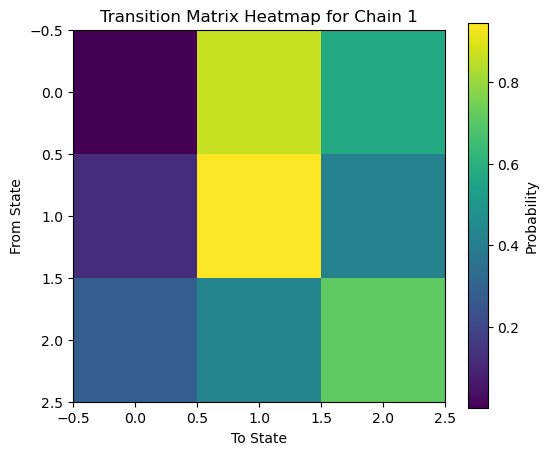

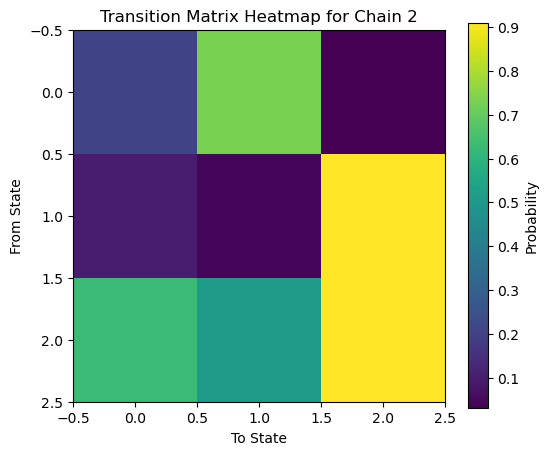

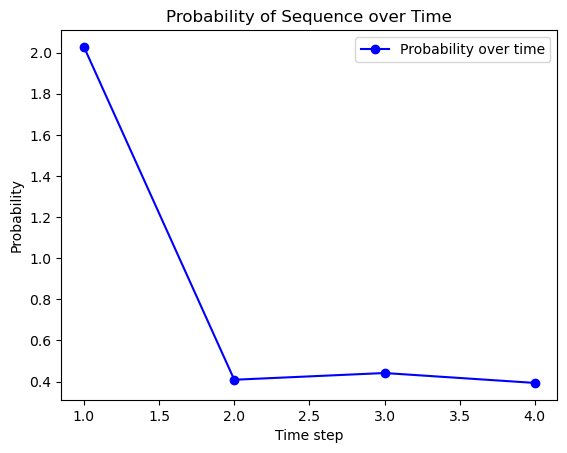

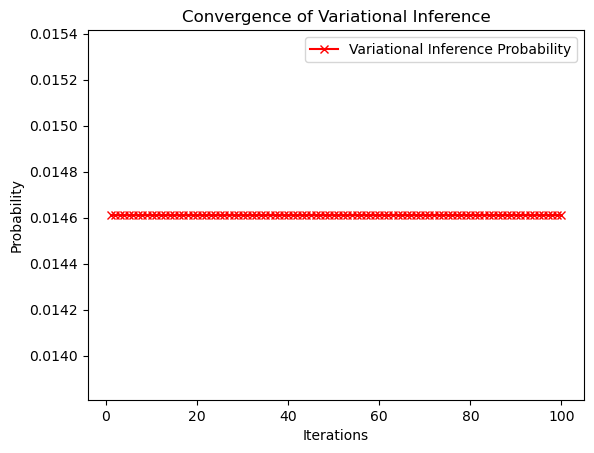

In [9]:
import random
import matplotlib.pyplot as plt

class FHMM:
    def __init__(self, n_states, n_obs, n_chains):
        """
        Initialize the Factorial HMM.
        
        Parameters:
        - n_states: Number of states in each chain.
        - n_obs: Number of possible observation values.
        - n_chains: Number of latent chains.
        """
        self.n_states = n_states
        self.n_obs = n_obs
        self.n_chains = n_chains
        
        # Transition probability for each chain
        self.transition_probs = [[[random.random() for _ in range(n_states)] for _ in range(n_states)] for _ in range(n_chains)]
        
        # Emission probability for each state
        self.emission_probs = [[[random.random() for _ in range(n_obs)] for _ in range(n_states)] for _ in range(n_chains)]
        
        # Initial state probabilities
        self.initial_probs = [[random.random() for _ in range(n_states)] for _ in range(n_chains)]
        
    def forward(self, sequence):
        """
        Forward pass for computing the probability of the sequence using the factorial HMM.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        
        Returns:
        - Probability of the observed sequence.
        """
        T = len(sequence)  # Length of the sequence
        alpha = [[[0.0 for _ in range(self.n_states)] for _ in range(self.n_chains)] for _ in range(T)]  # Forward variable
        
        # Initialization
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                alpha[0][chain][state] = self.initial_probs[chain][state] * self.emission_probs[chain][state][sequence[0]]
        
        # Recursion (Forward pass)
        for t in range(1, T):
            for chain in range(self.n_chains):
                for state in range(self.n_states):
                    alpha[t][chain][state] = 0
                    for prev_state in range(self.n_states):
                        alpha[t][chain][state] += alpha[t-1][chain][prev_state] * self.transition_probs[chain][prev_state][state]
                    alpha[t][chain][state] *= self.emission_probs[chain][state][sequence[t]]
        
        # Marginalize over the chains and states to get the final probability of the sequence
        final_prob = 0.0
        for chain in range(self.n_chains):
            for state in range(self.n_states):
                final_prob += alpha[T-1][chain][state]
        
        return final_prob
    
    def variational_inference(self, sequence, max_iterations=100):
        """
        Variational inference for approximating the factorial HMM model.
        
        Parameters:
        - sequence: A list of observations (sequence of x).
        - max_iterations: Number of iterations for variational inference.
        
        Returns:
        - Approximate probability of the observed sequence.
        """
        # Initialize variational parameters (factorized approximation)
        variational_params = [[[1.0 for _ in range(self.n_states)] for _ in range(len(sequence))] for _ in range(self.n_chains)]
        
        prob_list = []  # Store probability over iterations
        
        for _ in range(max_iterations):
            # Update the variational parameters using a simple update rule (mean-field)
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    for state in range(self.n_states):
                        # Calculate the expected emission probability
                        emission = self.emission_probs[chain][state][sequence[t]]
                        
                        # Calculate expected transition probabilities
                        transition = 0
                        if t > 0:
                            for prev_state in range(self.n_states):
                                transition += variational_params[chain][t-1][prev_state] * self.transition_probs[chain][prev_state][state]
                        else:
                            transition = 1
                        
                        # Update the variational parameters
                        variational_params[chain][t][state] = emission * transition
            
            # Normalize the variational parameters
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    total = sum(variational_params[chain][t])
                    for state in range(self.n_states):
                        variational_params[chain][t][state] /= total
            
            # Compute the approximate probability
            prob = 1.0
            for t in range(len(sequence)):
                for chain in range(self.n_chains):
                    emission_prob = 0
                    for state in range(self.n_states):
                        emission_prob += variational_params[chain][t][state] * self.emission_probs[chain][state][sequence[t]]
                    prob *= emission_prob
            prob_list.append(prob)
        
        return prob_list

    def plot_transition_heatmap(self):
        """Plot heatmap of transition probabilities."""
        for chain in range(self.n_chains):
            plt.figure(figsize=(6, 5))
            plt.imshow(self.transition_probs[chain], cmap='viridis', interpolation='nearest')
            plt.title(f"Transition Matrix Heatmap for Chain {chain+1}")
            plt.colorbar(label='Probability')
            plt.xlabel('To State')
            plt.ylabel('From State')
            plt.show()

    def plot_probability_over_time(self, sequence):
        """Plot the probability of the sequence over time (forward algorithm)."""
        T = len(sequence)
        prob_over_time = [self.forward(sequence[:t+1]) for t in range(T)]
        
        plt.plot(range(1, T+1), prob_over_time, marker='o', color='b', label='Probability over time')
        plt.xlabel('Time step')
        plt.ylabel('Probability')
        plt.title('Probability of Sequence over Time')
        plt.legend()
        plt.show()

    def plot_variational_inference(self, sequence):
        """Plot the convergence of variational inference."""
        prob_list = self.variational_inference(sequence)
        
        plt.plot(range(1, len(prob_list)+1), prob_list, marker='x', color='r', label='Variational Inference Probability')
        plt.xlabel('Iterations')
        plt.ylabel('Probability')
        plt.title('Convergence of Variational Inference')
        plt.legend()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Define number of states, observations, and latent chains
    n_states = 3
    n_obs = 4  # Number of different observations
    n_chains = 2  # Number of latent chains
    
    # Create the FHMM model
    model = FHMM(n_states, n_obs, n_chains)
    
    # Example sequence (observations)
    sequence = [0, 1, 2, 3]
    
    # Plot Transition Matrix Heatmap
    model.plot_transition_heatmap()
    
    # Plot Probability over Time (Forward Algorithm)
    model.plot_probability_over_time(sequence)
    
    # Plot Variational Inference Convergence
    model.plot_variational_inference(sequence)
